In [1]:
import numpy as np
import sympy as sp
from sympy import symbols

In [2]:
eps_cs, eps_cd, eps_ca, beta_ds_t_t_s, k_h, eps_cd0, t, t_s, h_0, A_c, u, alpha_ds1, alpha_ds2, f_cm, f_cmo, beta_RH, RH, RH_0, beta_as_t, eps_ca_infty, f_ck, kappa_cs, alpha_e, E_s, E_c_eff, E_cm, phi, S, I= symbols(r'\varepsilon_{cs}, \varepsilon_{cd}, \varepsilon_{ca}, \beta_{ds}{(t_ts)}, k_h, \varepsilon_{cd0}, t, t_s, h_0, A_c, u, \alpha_{ds1}, \alpha_{ds2}, f_{cm}, f_{cmo}, \beta_{RH}, RH, RH_0,  \beta_{as}{(t)}, \varepsilon_{ca}{(\infty)}, f_{ck}, \kappa_{cs}, \alpha_{e}, E_s, E_{c_eff}, E_{cm}, \varphi, S, I', real=True, nonnegative=True)

### Shrinkage curvature calculation based on section 3.1.4 Creep and shrinkage of the EC2

(6) The total shrinkage strain is composed of two components, the drying shrinkage strain and
the autogenous shrinkage strain. The drying shrinkage strain develops slowly, since it is a
function of the migration of the water through the hardened concrete. The autogenous
shrinkage strain develops during hardening of the concrete: the major part therefore develops in
the early days after casting. Autogenous shrinkage is a linear function of the concrete strength.
It should be considered specifically when new concrete is cast against hardened concrete.
Hence the values of the total shrinkage strain $\varepsilon_{cs}$ follow from

$$ \varepsilon_{cs} = \varepsilon_{cd} + \varepsilon_{ca} \hspace{10cm}           (3.8) $$

| Symbol | Unit | Description
| :-: | :-: | :- |
| $\varepsilon_{cs}$ | - | is the total shrinkage strain|
| $\varepsilon_{cd}$ | - | is the drying shrinkage strain |
| $\varepsilon_{ca}$ | - | is the autogenous shrinkage strain |

In [3]:
eps_cs = eps_cd + eps_ca
eps_cs

\varepsilon_{ca} + \varepsilon_{cd}

The development of the drying shrinkage strain in time follows from:

 $$\varepsilon_{cd}(t) = \beta_{ds}{(t, t_s)} . k_h . \varepsilon_{cd,0} \hspace{10cm}(3.9)$$               

In [4]:
eps_cd = beta_ds_t_t_s * k_h * eps_cd0
eps_cd

\beta_{ds}{(t_ts)}*\varepsilon_{cd0}*k_h

Table 3.3 Values for kh in Expression (3.9)

| Symbol | Unit | Description
| :-: | :-: | :- |
| $k_h$ | - | is a coefficient depending on the notional size ho according to Table 3.3|
| $\varepsilon_{cd,0}$ | - | nominal unrestrained drying shrinkage values $\varepsilon_{cd,0}$ (in ‰ ) for concrete cement Class|
| $\beta_{ds}$ $(t, t_s)$ | - | coefficient |

| $h_0$ | k_h| 
| :-: | :-: 
| 100 | 1.0
| 200| 0.85
| 300 | 0.75
| $\leq$ 500 | 0.70

0.7

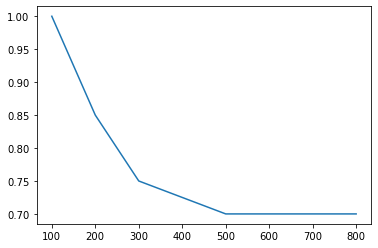

In [5]:
import matplotlib.pyplot as plt
import numpy as np
h_0_ = [100, 200 ,300, 500, 800]
k_h_ = [ 1, 0.85, 0.75, 0.7, 0.7 ]
plt.plot(h_0_, k_h_)
h_0 = 10000
k_h = np.interp(h_0, h_0_, k_h_)
k_h

$$\beta_{ds}{(t, t_s)} = \frac{(t - t_s)}{(t - t_s)+0.04  \sqrt{h_0^3}}\hspace{7cm}(3.10)$$

$$h_0 = 2A_c/u$$

| Symbol | Unit | Description
| :-: | :-: | :- |
| t | days | is the age of the concrete at the nloment considered |
| $t_{s}$ | days | is the age of the concrete at the beginning of drying shrinkage (or swelling). Normally this is at the end of curing. |
| $h_0$ | mm | is the notional size of the cross-section|
| $$A_c$$ | $$mm^2$$ | is the concrete cross-sectional area|
| u | mm | is the perimeter of that part of the cross section which is exposed to drying |

In [6]:
beta_ds_t_t_s = (t - t_s) / ((t - t_s) + 0.04 * h_0 ** (3/2))
h_0 = 2 * A_c / u
beta_ds_t_t_s, h_0

((t - t_s)/(t - t_s + 40000.0), 2*A_c/u)

### B.2 Basic equations for determining the drying shrinkage strain


$$\varepsilon_{cd,0} = 0.85 \left[ (220 + 110 . \alpha_{ds1}).exp \left(-\alpha_{ds2} .\frac{f_{cm}}{f_{cmo}}\right)         \right] . 10^{-6} . \beta_{RH}\hspace{7cm}(B.11)$$

$$\beta_{RH} = 1.55\left[1-\left(\frac{RH}{RH_0}\right)^3\right]\hspace{13.5cm}(B.12)$$

| Symbol | Unit | Description
| :-: | :-: | :- |
| $f_{cm}$ | MPa | is the mean compressive strength |
| $f_{cmo}$ | Mpa | 10 |
| $\alpha_{ds1}$ | - | is a coefficient which depends on the type of cement (see 3.1.2 (6));3 for S, 4 for N, 6 for R|
| $\alpha_{ds2}$ | - | is a coefficient which depends on the type of cement; 0,13 for S, 0,12 for N, 0,11 for R|
| RH | % | is the ambient relative humidity |
| RH0 | % | 100 |

In [7]:
eps_cd0 = 0.85 * ((220 + 110 * alpha_ds1) * sp.exp(-alpha_ds2 * f_cm / f_cmo)) * 1e-6 * beta_RH
beta_RH = 1.55 * (1 - (RH/RH_0)**3)
eps_cd0, beta_RH

(8.5e-7*\beta_{RH}*(110*\alpha_{ds1} + 220)*exp(-\alpha_{ds2}*f_{cm}/f_{cmo}),
 -1.55*RH**3/RH_0**3 + 1.55)

#### The autogenous shrinkage strain follows from:


 $$\varepsilon_{ca}(t) = \beta_{as}(t)\varepsilon_{ca}(\infty) \hspace{10cm}(3.11)$$               

$$\varepsilon_{ca}(\infty) = 2.5 (f_{ck} - 10)10^{-6}\hspace{10cm}(3.12)$$

$$\beta_{as}(t) = 1 - exp(-0.2t^{0.5})\hspace{10cm}(3.13)$$

| Symbol | Unit | Description
| :-: | :-: | :- |
| t | days | Time being considered |
| $f_{ck}$ | Mpa | Characteristic compressive cylinder strength of concrete at 28 days |

In [8]:
eps_ca = beta_as_t * eps_ca_infty
eps_ca_infty = 2.5 * (f_ck - 10) * 1e-6
beta_as_t = 1 - sp.exp(- 0.2 * t ** 0.5)
eps_ca, eps_ca_infty, beta_as_t

(\beta_{as}{(t)}*\varepsilon_{ca}{(\infty)},
 2.5e-6*f_{ck} - 2.5e-5,
 1 - exp(-0.2*t**0.5))

#### (6) Shrinkage curvatures may be assessed using Expression (7.21):7

$$ E_{\mathrm{c,eff}} = \frac{E_{cm}}{1 + \varphi (\infty,t_0)}\hspace{10cm}(7.20)$$

$$ \frac{1}{r_{cs}} = \varepsilon_{cs} \alpha_e \frac{S}{I} \hspace{10cm}(7.21)$$

$$\alpha_e = E_s / E_{\mathrm{c,eff}}$$

| Symbol | Unit | Description
| :-: | :-: | :- |
| $E_{\mathrm{c,eff}}$ | - | is the effective modulus of elasticity of concrete |
| $E_{cm}$ | - | is the secant modulus of elasticity of concrete |
| $\varphi$ | - | is the final creep coefficient |
| $1/r_{cs}$ | - | is the curvature due to shrinkage |
| $\varepsilon_{cs}$ | - | is the free shrinkage strain (see 3.1.4) |
| S | - | is the first moment of area of the reinforcement about the centroid of the section|
| I | - | is the second moment of area of the section|
| $\alpha_e$ | % |is the effective modular ratio |


In [9]:
E_c_eff = E_cm / (1 + phi)
alpha_e = E_s / E_c_eff
kappa_cs = eps_cs * alpha_e * S / I
E_c_eff, alpha_e, kappa_cs

(E_{cm}/(\varphi + 1),
 E_s*(\varphi + 1)/E_{cm},
 E_s*S*(\varepsilon_{ca} + \varepsilon_{cd})*(\varphi + 1)/(E_{cm}*I))

In [10]:
def get_kappa_shrinkage():
    
    f_ck = 20
    t = 125
    t_s = 10
    alpha_ds1 = .2
    alpha_ds2 = .35
    RH = 40
    RH_0 = 100
    f_cm = 20
    f_cmo = 10
    phi = 2.5 # where is the formula!
    E_s = 200000
    E_cm = 35000
    S = 100
    I = 100
    A_c = 10000
    u = 75
       
    eps_ca_infty = 2.5 * (f_ck - 10) * 1e-6    
    beta_as_t = 1 - sp.exp(- 0.2 * t ** 0.5)
    eps_ca = beta_as_t * eps_ca_infty
    
    beta_RH = 1.55 * (1 - (RH/RH_0)**3)
    h_0 = 2 * A_c / u
    beta_ds_t_t_s = (t - t_s) / ((t - t_s) + 0.04 * h_0 ** (3/2))
    h_0_ = [100, 200 ,300, 500, 800]
    k_h_ = [1, 0.85, 0.75, 0.7, 0.7]
    k_h = np.interp(h_0, h_0_, k_h_)
    eps_cd0 = 0.85 * ((220 + 110 * alpha_ds1) * sp.exp(-alpha_ds2 * f_cm / f_cmo)) * 1e-6 * beta_RH    
    eps_cd = beta_ds_t_t_s * k_h * eps_cd0   
    
    eps_cs = eps_cd + eps_ca
    
    E_c_eff = E_cm / (1 + phi)
    alpha_e = E_s / E_c_eff
    kappa_cs = eps_cs * alpha_e * S / I

    return kappa_cs

In [11]:
get_kappa_shrinkage()

0.00136984007382824

### Shrinkage curvature calculation based on DAfStb Unterausschuss Nichtmetallische Bewehrung - Herleitung von Biegeschlankheitskriterien
Vorbemerkung: Die nachfolgenden Ergebnisse stammen aus:
El Ghadioui, Redouan: „Bemessung carbonbewehrter Betonbauteile unter besonderer Betrachtung des
Gebrauchszustandes - Entwicklung eines Modells zur wirklichkeitsnahen Verformungsberechnung“,
Technische Universität Darmstadt, Dissertation, 2020

$$ E_{c,eff} = \frac{E_{cm}}{1 + \varphi_{eq} (\infty,t_0)}$$

In [12]:
E_cm = 35000; phi_eq = 1.6
E_c_eff = E_cm / (1 + phi_eq)
E_c_eff

13461.538461538461

$$h_0 = 2A_c/u$$

In [32]:
A_c = 1000 * 300
u = 2 * 1300
h_0 = 2 * A_c / u

$$\alpha_1 = \left[\frac{35}{f_{cm}} \right]^{0.7} \hspace{1cm} \alpha_2 = \left[\frac{35}{f_{cm}} \right]^{0.2} \hspace{1cm} \alpha_3 = \left[\frac{35}{f_{cm}} \right]^{0.5} $$

In [33]:
f_cm = 30
alpha1 = (35/f_cm)**0.7
alpha2 = (35/f_cm)**0.2
alpha3 = (35/f_cm)**0.5
alpha1, alpha2, alpha3

(1.1139424459794183, 1.031310306477545, 1.0801234497346435)

$$ \varphi_{RH} = 1 + \frac{1 - RH/100}{0.1 . \sqrt[3]{h_0}} \hspace{2cm} for f_{cm} \leq 35 MPa$$

$$ \varphi_{RH} = \left[1 + \frac{1 - RH/100}{0.1 . \sqrt[3]{h_0}} . \alpha_1\right] . \alpha_2 \hspace{2cm} for f_{cm} > 35 MPa$$

In [34]:
RH = 70
phi_RH = sp.Piecewise((1 + (1-RH/100)/(0.1 * h_0**(1/3)), f_cm <= 35),
                      ((1 + ((1-RH/100)/(0.1 * h_0**(1/3))) * alpha1) * alpha2, f_cm > 35))
phi_RH

1.48909732465087

$$ \beta{(f_{cm})} = \frac{16.8}{\sqrt{f_{cm}}} $$

In [35]:
beta_fcm = 16.8 / f_cm**0.5
beta_fcm

3.0672463220289305

$$ \beta{(t_{0})} = \frac{1}{0.1 + t_0^{0.20}} $$

In [36]:
t_s = 3
t = 100000000
t_0 = 10
t_1 = 60
t_3 = 365

In [37]:
beta_t0 = 1 / (0.1 + t_0**0.20)
beta_t0

0.593509431027676

$$ \beta_H = 1.5 [ 1 + (0.012 RH)^{18}] h_0 + 250 \leq 1500 \hspace{2cm} for f_{cm} \leq 35 $$

$$ \beta_H = 1.5 [ 1 + (0.012 RH)^{18}] h_0 + 250 \alpha_3 \leq 1500 \alpha_3 \hspace{2cm} for f_{cm} \leq 35 $$

In [38]:
beta_H = sp.Piecewise((1.5*(1 + 0.012*RH)**18 * h_0 + 250, f_cm <=35),
                     (1.5*(1 + 0.012*RH)**18 * h_0 + 250 * alpha3, f_cm > 35))
beta_H

20229974.8400678

$$ \beta_c (t,t_0) = \left[ \frac{(t - t_0)}{(\beta_H + t - t_0)} \right]^{0.3} $$

$$ \varphi_0 = \varphi_{RH} . \beta{(f_{cm})} . \beta{(t_{0})} $$

In [20]:
phi_0 = phi_RH * beta_fcm * beta_t0
phi_0

2.66891899349227

In [21]:
beta_ctt0 = ((t-t_0)/(beta_H + t - t_0))** 0.3
beta_ctt0

0.938922885733641

ANNEX B (Informative)
Creep and shrinkage strain
B.1 Basic equations for determining the creep coefficient
(1) The creep coefficient qJ(t,ta} may be calculated from:

$$ \varphi(t,t_0) = \varphi_0 . \beta_c (t,t_0) $$

In [22]:
phi_tt0 = phi_0 * beta_ctt0
phi_tt0

2.50590912315908

- Beanspruchungen

Eigenlast gk 36 % der gesamten charakteristischen Last pk

Ausbaulast Δgk 24 % der gesamten charakterischen Last pk

Nutzlast ψ2 ∙ qk 0,3 ∙ 40 % der gesamten charakteristischen Last pk

Bemessungslast GZT 1,35 ∙ (36 % + 24 %) + 1,5 ∙ 40 % = 141 %

Quasi-ständige Last GZG 36 % + 24 % + 0,3 ∙ 40 % = 72 %

Verhältnis GZG / GZT 72 / 141 = 51 %
- Relative Luftfeuchtigkeit
RH = 70 %
- Zeitpunkte
Dauer der Nachbehandlung: ts = 3 Tage

Eigenlast gk: t0 = 10 Tage

Ausbaulast Δgk: t1 = 60 Tage

Nutzlasten qk+Δqk: t2 = 365 Tage

$$ \varphi_{eq}(\infty,t_0) = \frac{\varphi(\infty,t_0).g_k +\varphi(\infty,t_1).\Delta g_k + \varphi(\infty,t_2) . \sum {\psi_{2,i}} . q_{k,i}} {g_k + \Delta g_k + \sum {\psi_{2,i}} . q_{k,i} }$$

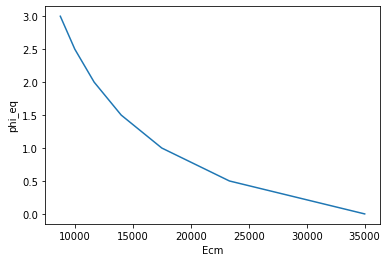

In [39]:
phi_eq = (0, .5, 1, 1.5 , 2, 2.5, 3)
E_c_eff = E_cm / (np.ones_like(phi_eq) + phi_eq)

import matplotlib.pyplot as plt 
plt.plot(E_c_eff, phi_eq)
plt.xlabel('Ecm')
plt.ylabel('phi_eq')
plt.show()

In [40]:
phi_t0 = 1 
phi_t1 = 2
phi_t2 = 3

g_k = 0.36
Delta_gk = 0.24
psi_2i = 0.3
q_ki = 0.40
E_cm = 35000
phi_eq = (phi_t0 * g_k + phi_t1 * Delta_gk + phi_t2* psi_2i * q_ki) / (g_k + Delta_gk + psi_2i * q_ki)
E_c_eff = E_cm / (1 + phi_eq)
phi_eq

1.6666666666666667

In [25]:
eta = 0.51 # = GZG / GZT

In [50]:
L = 6000
f_ck = 30
f_cd = 0.85 * f_cm / 1.5
M_Ed = 20
b = 1000
h = 300
d_2 = 80 #cover
d = h - d_2
mu_Ed = M_Ed / (b*d**2*f_cd)
mu_Ed

2.4307243558580458e-08

In [51]:
eps_fud = 2
mu_Ed_bal = 0.8095 * 3.5 / (3.5 + eps_fud) * (1 - 0.416 * 3.5 / (3.5 + eps_fud))
mu_Ed_bal

0.37876571900826445

In [ ]:
A_sf1 = 5.02 * 100 
A_sf2 = 5.02 * 100
E_sf = 200000
rho_1I = A_sf1 / (b * h)
rho_2I = A_sf2 / (b * h)
alpha_e = E_sf / E_c_eff
B_I = (alpha_e - 1) * (rho_1I + rho_2I)
A_I = B_I/h * (d + d_2)
k_xI = (0.5 + A_I)/(1 + B_I)
x_I = k_xI * h
z_sf1 = d - x_I
z_sf2 = d - d_2 - z_sf1

k_I = 1 + 12 * ( 0.5 - k_xI)**2\
    + 12 * (alpha_e - 1) * rho_1I * (d/h - k_xI)**2\
    + 12 * (alpha_e - 1) * rho_1I * A_sf2/A_sf1 * (k_xI - d_2/h)**2
I_I = k_I * b * h**3 / 12

S_I = A_sf1 * z_sf1 + A_sf2 * z_sf2 # z_sf2 < 0

In [ ]:
import numpy as np 

rho_1II = A_sf1 / (b * h)
rho_2II = A_sf2 / (b * h)
alpha_e = E_sf / E_c_eff
A_II = alpha_e * (rho_1II + rho_2II)
k_xII = -A_II + np.sqrt(A_II ** 2 + 2 * alpha_e * (rho_1II + rho_2II * d_2 / d))
x_II = k_xII * d
z_sf1 = d - x_II
z_sf2 = d - d_2 - z_sf1

k_II = 4 * k_xII**3\
    + 12 * alpha_e * rho_1II * (1 - k_xII)**2\
    + 12 * alpha_e * rho_1II * A_sf2/A_sf1 * (k_xII - d_2/d)**2
I_II = k_II * b * d**3 / 12

S_II = A_sf1 * z_sf1 + A_sf2 * z_sf2 # z_sf2 < 0

$$ \frac{w_m}{L} = \frac{5}{4} . \frac{\eta . \mu_{Ed} . f_{cd}}{E_{c,eff}} . \frac{L}{d} .\left( \frac{\xi}{k_{\mathrm{II}}} + \frac{(1-\xi)}{k_{\mathrm{I}} . (h/d)^3} \right) + Schwinden $$

In [ ]:
M_Ed = 100e6
import sympy as sp
f_ctm = sp.Piecewise(
                                (0.3*f_ck**(2/3), f_ck < 50),
                                ((2.12*np.log((1+(f_ck+8)/10))), f_ck >= 50)
            )
M_cr = f_ctm * I_I / x_I 
beta = 1 # one-time, short-term stressing; = 0.5 for permanent, repeated stressing
xi = 1 - beta * (M_cr / M_Ed) **2
w_m = (5/4) * (eta * mu_Ed * f_cd / E_c_eff) * (L / d) * (xi/k_II + (1-xi) / (k_I * (h/d)**3)) * L
M_cr, M_Ed, w_m

In [53]:
import numpy as np 

rho_1II = A_sf1 / (b * h)
rho_2II = A_sf2 / (b * h)
alpha_e = E_sf / E_c_eff
A_II = alpha_e * (rho_1II + rho_2II)
k_xII = -A_II + np.sqrt(A_II ** 2 + 2 * alpha_e * (rho_1II + rho_2II * d_2 / d))
x_II = k_xII * d
z_sf1 = d - x_II
z_sf2 = d - d_2 - z_sf1

k_II = 4 * k_xII**3\
    + 12 * alpha_e * rho_1II * (1 - k_xII)**2\
    + 12 * alpha_e * rho_1II * A_sf2/A_sf1 * (k_xII - d_2/d)**2
I_II = k_II * b * d**3 / 12

S_II = A_sf1 * z_sf1 + A_sf2 * z_sf2 # z_sf2 < 0

$$ \frac{w_m}{L} = \frac{5}{4} . \frac{\eta . \mu_{Ed} . f_{cd}}{E_{c,eff}} . \frac{L}{d} .\left( \frac{\xi}{k_{\mathrm{II}}} + \frac{(1-\xi)}{k_{\mathrm{I}} . (h/d)^3} \right) + Schwinden $$

In [58]:
M_Ed = 100e6
import sympy as sp
f_ctm = sp.Piecewise(
                                (0.3*f_ck**(2/3), f_ck < 50),
                                ((2.12*np.log((1+(f_ck+8)/10))), f_ck >= 50)
            )
M_cr = f_ctm * I_I / x_I 
beta = 1 # one-time, short-term stressing; = 0.5 for permanent, repeated stressing
xi = 1 - beta * (M_cr / M_Ed) **2
w_m = (5/4) * (eta * mu_Ed * f_cd / E_c_eff) * (L / d) * (xi/k_II + (1-xi) / (k_I * (h/d)**3)) * L
M_cr, M_Ed, w_m

(43120815.0779654, 100000000.0, 1.16070812063613e-5)